In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
#checking of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


here we can see null values in the dataset
1. in age column there is 177 null values
2. in cabin there is 687 null values
3. in embarked there is 2 null values

<AxesSubplot:>

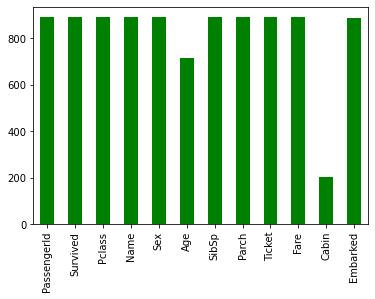

In [5]:
#for checking nan val
df.count().plot.bar(color="green")

this plot is to see null values in the dataset

In [6]:
#basic info about dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


describe is used to study realtion btw mean and std 

In [7]:
df.drop(columns=["Name","Cabin","PassengerId","Ticket"],axis=1,inplace=True)

1. as there is too much missing data in cabin column so i am droping it and it is also alpha numeric.
2. as name and passenger id and ticket does not have realtionship with my target column so i am droping these column

In [8]:
features=["Pclass","Age","SibSp","Parch","Fare"]

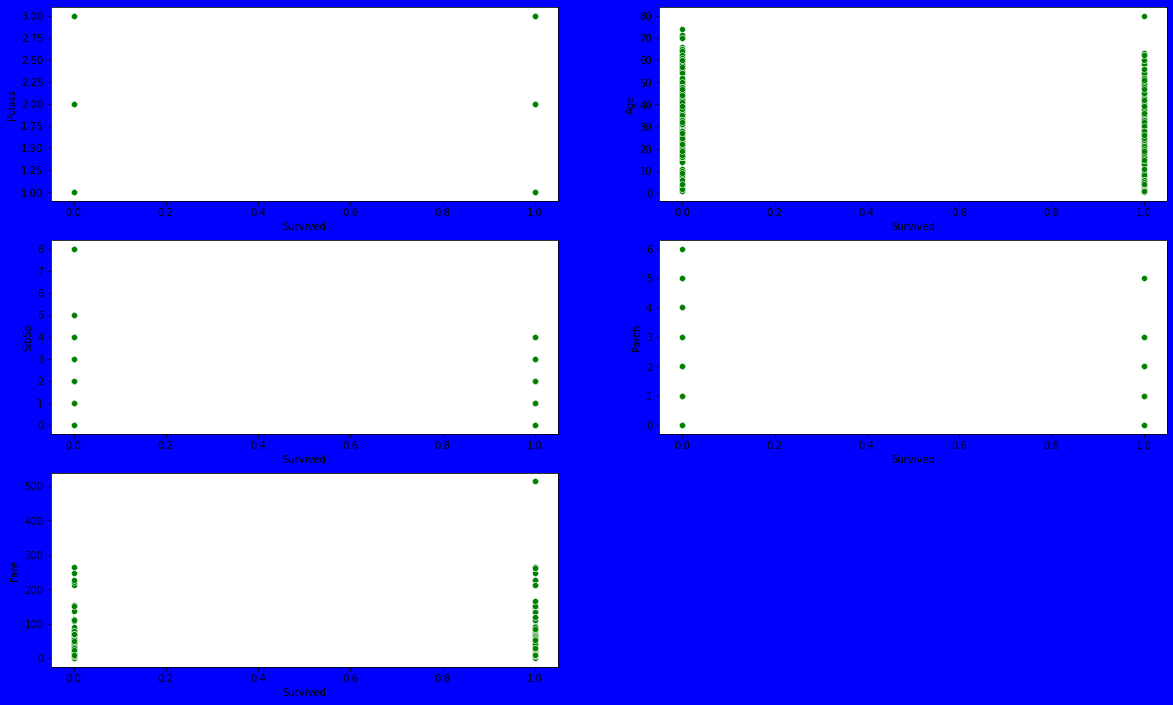

In [9]:
#bivariate analysis
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in features:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.scatterplot(x=df["Survived"],y=df[column],color="green")
    plotnumber+=1
plt.show()

In [10]:
#filling of missing values
from sklearn.impute import KNNImputer
knn=KNNImputer()
df[['Fare','Age']]=knn.fit_transform(df[['Fare','Age']])

In [11]:
#filling missing data by mode
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

<AxesSubplot:ylabel='Embarked'>

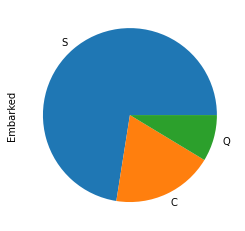

In [12]:
df["Embarked"].value_counts().plot.pie()

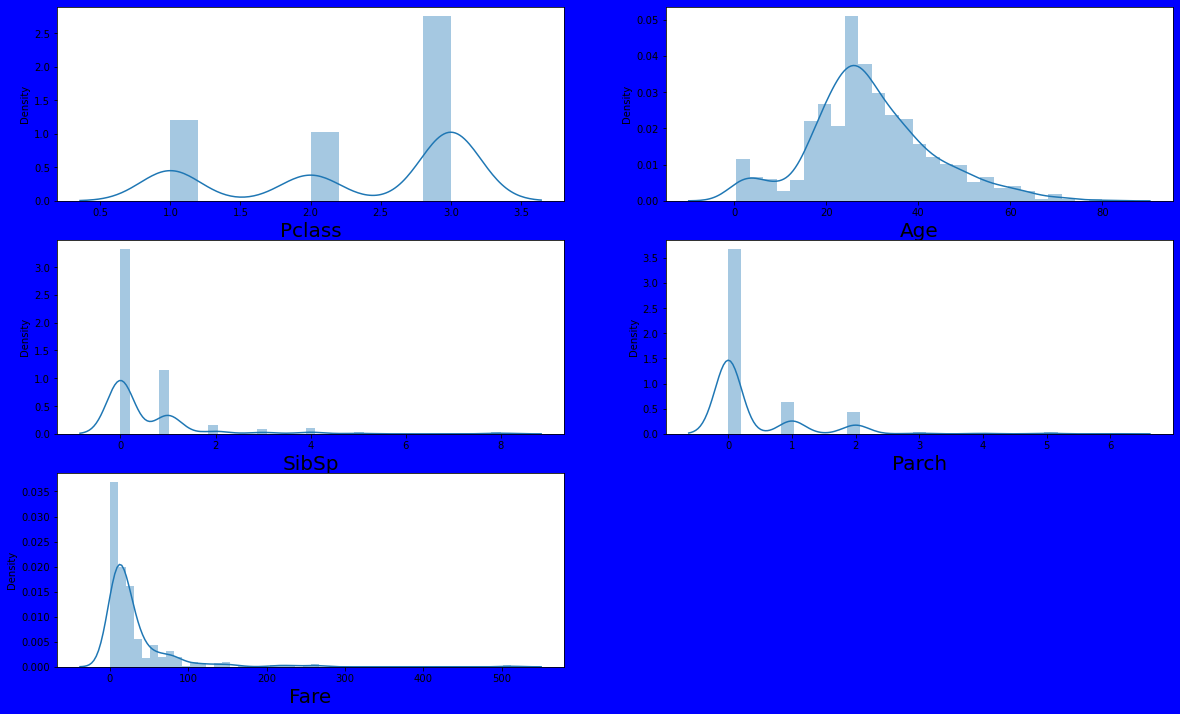

In [13]:
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in features:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

this plot is used to check the distribution of data in the column

In [14]:
#using label encoder 
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
df["Sex"]=la.fit_transform(df.Sex)
df["Embarked"]=la.fit_transform(df.Embarked)

label encoder is used to convet object data type to int 

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


<function matplotlib.pyplot.show(close=None, block=None)>

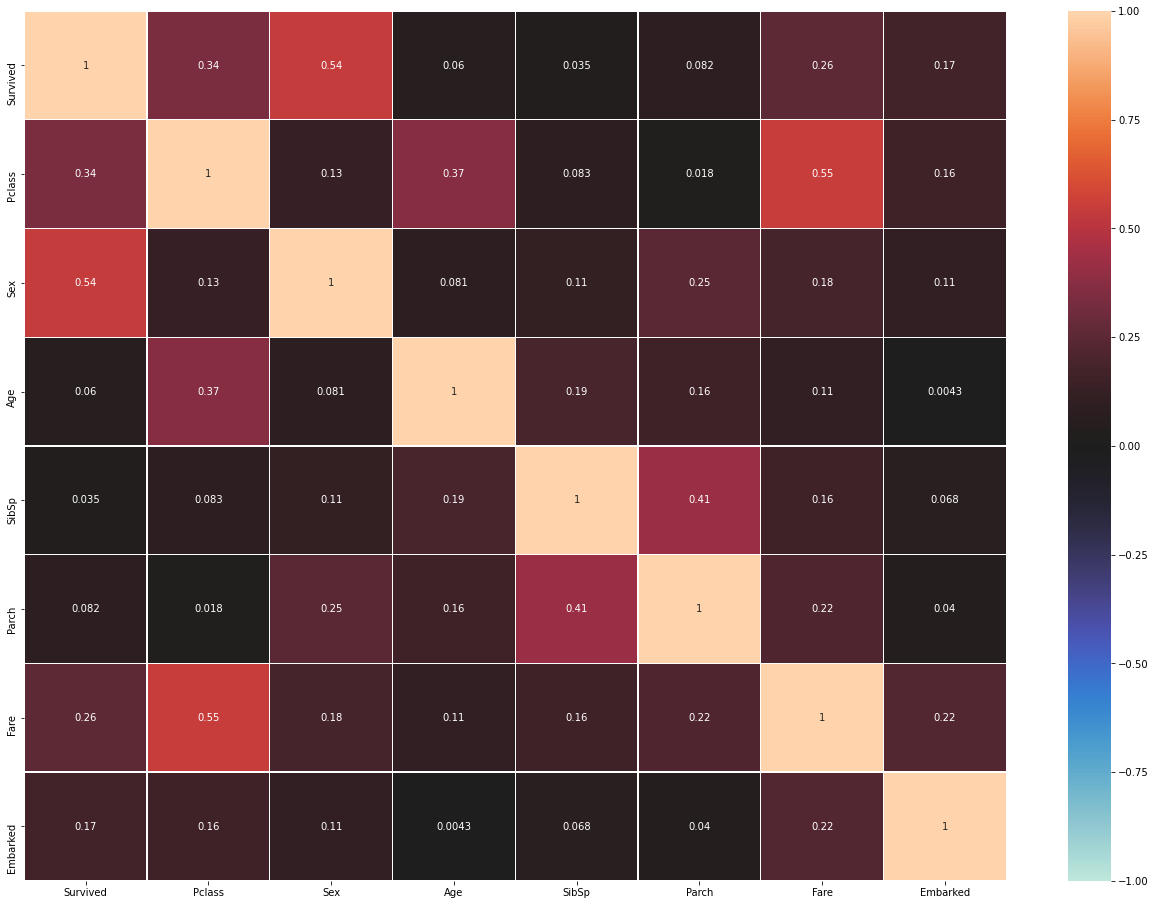

In [16]:
#multivsriste analysis
df_corr=df.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,center=0,fmt=".2g",linewidths=.2)
plt.show

corr plot is used to determine correaltion among features and labels
1. survived is my target column
2. all other features are compaired with target column to see correlation among them
3. embarked and sex have  object datatype we convert it to int by using label encoder
4. cabin and ticket have alphanumeric data.

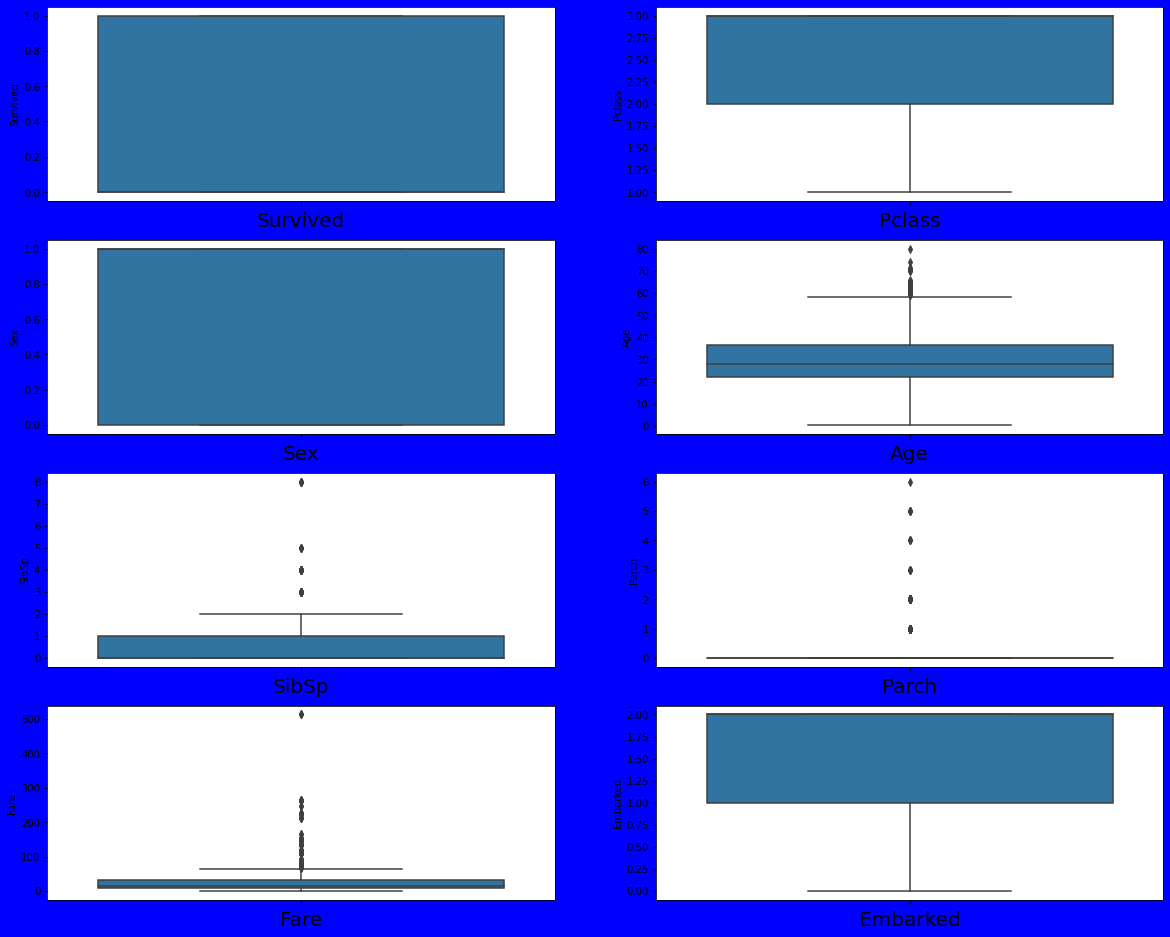

In [17]:
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(y=df[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

box plot is drawn to see outliers among the features i am not taking care of outliers because:
1. sex,embarked,sibsp,parch is categorical column.

2 as some person have a good diet and they reguraly do exercise so they can have a long life span.

3 titanic is a royal ship so it is possible theat it may have luxurious rooms for which they are charging more and some special treatment may be provided to the passenger.

In [18]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.436074
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

In [19]:
#using power transform to remove skewness in the dataset
from sklearn.preprocessing import PowerTransformer
scale=PowerTransformer(method='yeo-johnson')

In [20]:
df[["Fare"]]=scale.fit_transform(df[["Fare"]].values)
df["Fare"]

0     -0.878820
1      1.336651
2     -0.790065
3      1.067352
4     -0.774439
         ...   
886   -0.294907
887    0.527906
888    0.288885
889    0.527906
890   -0.812349
Name: Fare, Length: 891, dtype: float64

In [21]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.436074
SibSp       3.695352
Parch       2.749117
Fare       -0.040329
Embarked   -1.264823
dtype: float64

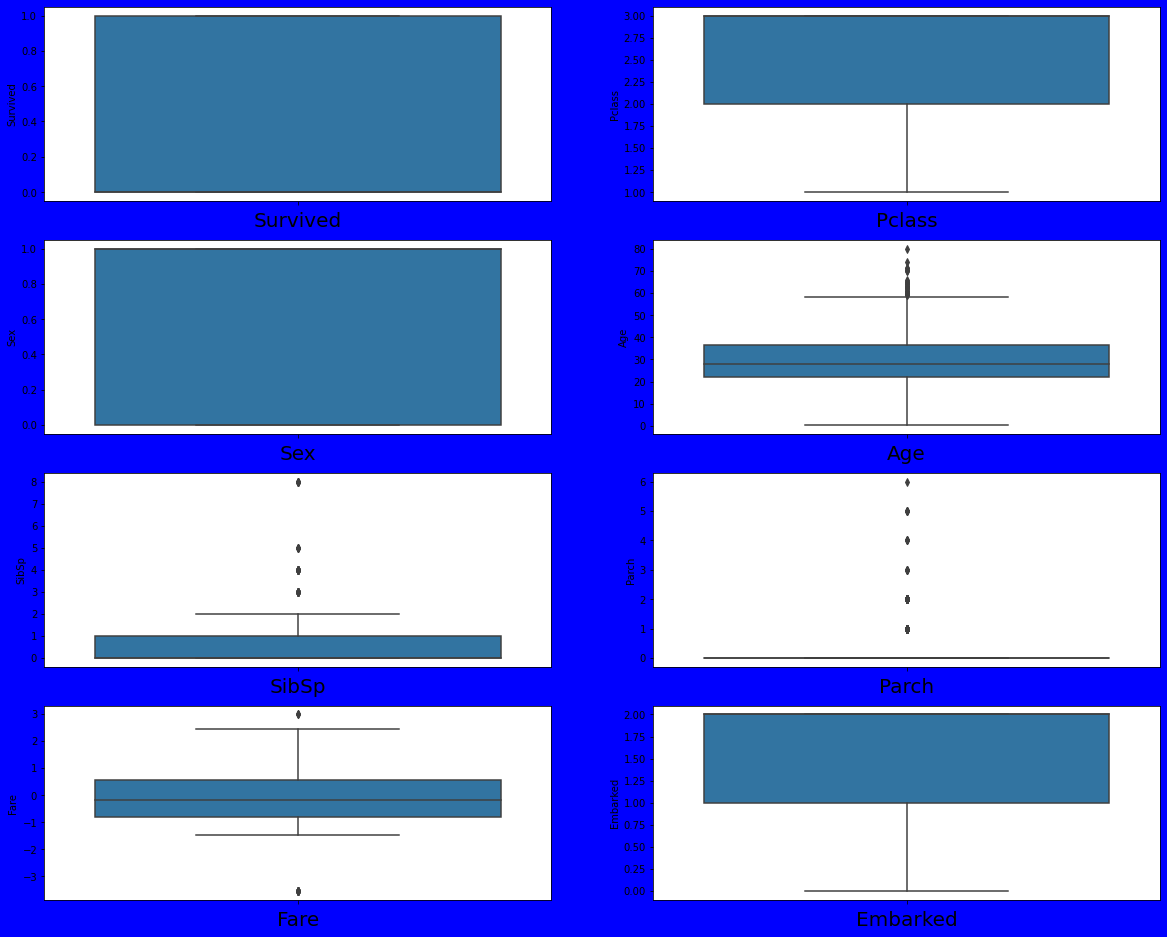

In [22]:
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(y=df[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [23]:
x=df.drop(columns='Survived')
y=df['Survived']

<AxesSubplot:ylabel='Survived'>

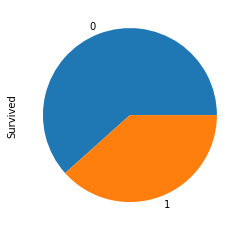

In [24]:
y.value_counts().plot.pie()

as we can see from the pie plot that target column is balanced

# model building

In [25]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


In [26]:
scale=StandardScaler()
x_scaled=scale.fit_transform(x)


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=50)

# logistic regression 

In [28]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_pred=lr.predict(x_test)

In [30]:

print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.81      0.88      0.85       130
           1       0.81      0.71      0.76        93

    accuracy                           0.81       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



In [31]:
accuracy_score(y_test,y_pred)

0.8116591928251121

In [32]:
cross_val_score(lr,x_scaled,y,cv=3).mean()

0.7890011223344556

In [33]:
confusion_matrix(y_test,y_pred)

array([[115,  15],
       [ 27,  66]], dtype=int64)

# Decison tree classifier

In [34]:
dt = DecisionTreeClassifier()

In [35]:
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [36]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       130
           1       0.82      0.66      0.73        93

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.78       223
weighted avg       0.80      0.80      0.79       223



In [37]:
print(cross_val_score(dt,x_scaled,y,cv=5).mean())


0.773316176009039


In [38]:
accuracy_score(y_test,y_pred)

0.7982062780269058

In [39]:
confusion_matrix(y_test,y_pred)

array([[117,  13],
       [ 32,  61]], dtype=int64)

# adaboostclassifier

In [40]:
ad= AdaBoostClassifier()

In [41]:
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [42]:
y_pred= ad.predict(x_test)

In [43]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.81      0.73      0.77        93

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.82      0.81       223



In [44]:
accuracy_score(y_test,y_pred)

0.8161434977578476

In [45]:
print(cross_val_score(ad,x_scaled,y,cv=5).mean())


0.8103885506245684


In [46]:
confusion_matrix(y_test,y_pred)

array([[114,  16],
       [ 25,  68]], dtype=int64)

# knn

In [47]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
y_pred=knn.predict(x_test)

In [49]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.79      0.91      0.84       130
           1       0.84      0.66      0.73        93

    accuracy                           0.80       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.81      0.80      0.80       223



In [50]:
accuracy_score(y_test,y_pred)

0.8026905829596412

In [51]:
print(cross_val_score(knn,x_scaled,y,cv=5).mean())


0.8081099742640134


In [52]:
confusion_matrix(y_test,y_pred)

array([[118,  12],
       [ 32,  61]], dtype=int64)

# adaboost classifier  is my best model

In [56]:
grid_params= {
    "n_estimators":[50,100,150,200],
    'learning_rate':[1,2,3,4,5],
    'random_state':[1,5,6,10,15]
}

In [57]:
grid_search = GridSearchCV(estimator = ad,
                          param_grid = grid_params,
                          cv=3,n_jobs=-1)

In [58]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200],
                         'random_state': [1, 5, 6, 10, 15]})

In [59]:
grid_search.best_params_

{'learning_rate': 1, 'n_estimators': 200, 'random_state': 1}

In [60]:
ad= AdaBoostClassifier(learning_rate=1, n_estimators=200, random_state=1)

In [61]:
ad.fit(x_train,y_train)
y_pred=ad.predict(x_test)

In [62]:
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.82      0.72      0.77        93

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.81       223



In [64]:
print(cross_val_score(ad,x_scaled,y,cv=5).mean())


0.8137342288619672


In [65]:
confusion_matrix(y_test,y_pred)

array([[115,  15],
       [ 26,  67]], dtype=int64)

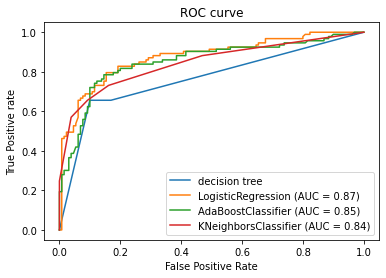

In [66]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
disp = plot_roc_curve(dt,x_test,y_test, label='decision tree')

plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ad,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)


plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

In [67]:
#saving dataset
import pickle
filename='titanic.pk1'
pickle.dump(knn,open(filename,'wb'))